https://medium.com/@baditaflorin/key-differences-between-medium-posts-tagged-artificial-intelligence-machine-learning-deep-f9b3826a3f27

![a](lan_goodfellow.PNG)

### Representation learning
- 구조 상의 특징을 찾아내는 학습(숨겨진 구조 찾는)

AI>ML>RL>DL

### model

- 실생활 > 특별한 가정하에 단순화 하여 특별한 형태로 만들어서 해결
- **computational model** : 기계(컴퓨터)가 계산 가능한 모델
- Intelligence > AI
- 그림/기호/수식/글 등으로 표현
    - computational model는 programming구조를 통해 나타냄
- 사람과 컴퓨터가 모두 이해가능한 **Math**로 표현
- 컴퓨터는reasoning을 못함
    - 사람의 가이드라인 내 최적의 선택(knowledge base)
    - symbol을 기준으로 logic으로 문제 풀기, 이성적 논리구조(machine learning)
- function programming


## Autoencoder
- 단순화한 특징 찾기
- 복원도 가능
- 압축 전, 후로 다른 mode
- 고유 특징을 supervise learning에서 label없이 특징 찾기

https://blog.keras.io/building-autoencoders-in-keras.html

- autoencoder 잘 나온 예시

Recent Advances in Autoencoder-Based Representation Learning

- 최근 잘 나온 논문
- 고유 특성을 supervised없이 뽑기

Learning useful representations with little or no supervision is a key challenge in
artificial intelligence

- 압축 -> 고유 특성 찾기 -> 손실 있는 복원(생성)
- **encoding, decoding, loss function** 중요

실용성
- data denoising
- dimensionality for data visualization
- VAE : 생성 모델


---

## Implement issue

In [1]:
import tensorflow as tf

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [103]:
(x_train, _),(x_test, _) = tf.keras.datasets.mnist.load_data()

In [104]:
x_train = x_train.reshape(60000,28*28)
x_train = x_train/255

inputs = tf.keras.layers.Input((784,))
encoder = tf.keras.layers.Dense(32,activation='relu')(inputs)
decoder = tf.keras.layers.Dense(784,activation='sigmoid')(encoder)


autoencoder = tf.keras.models.Model(inputs, decoder)

In [105]:
# 자신이 잘 나오는지 아닌지 loss : binary_crossentropy
autoencoder.compile(loss = 'binary_crossentropy',optimizer='adam')

In [106]:
autoencoder.fit(x_train, x_train, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 2s 944us/step - loss: 0.1613
Epoch 2/50
1875/1875 [==============================] - 2s 959us/step - loss: 0.1038
Epoch 3/50
1875/1875 [==============================] - 2s 858us/step - loss: 0.0964
Epoch 4/50
1875/1875 [==============================] - 2s 894us/step - loss: 0.0950
Epoch 5/50
1875/1875 [==============================] - 2s 861us/step - loss: 0.0945
Epoch 6/50
1875/1875 [==============================] - 2s 845us/step - loss: 0.0942
Epoch 7/50
1875/1875 [==============================] - 2s 909us/step - loss: 0.0940
Epoch 8/50
1875/1875 [==============================] - 2s 881us/step - loss: 0.0939
Epoch 9/50
1875/1875 [==============================] - 2s 868us/step - loss: 0.0938
Epoch 10/50
1875/1875 [==============================] - 2s 853us/step - loss: 0.0937
Epoch 11/50
1875/1875 [==============================] - 2s 889us/step - loss: 0.0937
Epoch 12/50
1875/1875 [==============================] - 2s 868

In [107]:
x_test = x_test.reshape(-1,28*28)
x_test = x_test/255

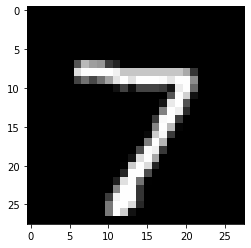

In [108]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0].reshape(28,28),cmap='gray')

In [34]:
import numpy as np

encoder_layer = autoencoder.layers[1]

In [35]:
encoder_layer(x_test[0][np.newaxis])

W1027 20:49:39.902041  8812 base_layer.py:2377] Layer dense_12 is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because its dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



<tf.Tensor: shape=(1, 32), dtype=float32, numpy=
array([[2.0251007e+00, 0.0000000e+00, 2.3448344e-01, 2.5413637e+00,
        1.4205833e-01, 3.7552378e+00, 1.7033662e-01, 0.0000000e+00,
        0.0000000e+00, 8.2977394e+01, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 9.0503899e+01, 5.9007984e+01,
        6.5964600e-03, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.3548296e+01, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 2.3473467e-01,
        0.0000000e+00, 0.0000000e+00, 1.5814668e+02, 0.0000000e+00]],
      dtype=float32)>

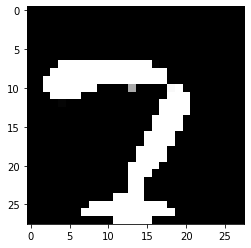

In [36]:
decoder_image = autoencoder(x_test[0][np.newaxis]).numpy()
plt.imshow(decoder_image.reshape(28,28),cmap='gray')

**개선**

In [37]:
inputs = tf.keras.layers.Input((784,))
encoder = tf.keras.layers.Dense(32,activation='relu')(inputs)
decoder = tf.keras.layers.Dense(784,activation='sigmoid')(encoder)

autoencoder = tf.keras.models.Model(inputs, decoder)
encoder_model = tf.keras.models.Model(inputs, encoder)

decoder_inputs = tf.keras.Input((32,))
decoder_layer = autoencoder.layers[-1]
decoder_model = tf.keras.models.Model(decoder_inputs, decoder_layer(decoder_inputs))

- 학습 잘되는지 모름


reguizar
- kernel regulizer
- bias
- activity_regularizer : activation되는 값을 규제사킴.

In [38]:
autoencoder.layers[-1]

In [40]:
decoder

<tf.Tensor 'dense_15/Sigmoid:0' shape=(None, 784) dtype=float32>

### regularizer
- 제약 사항을 주어 조건 규제하여 단순화 시켜서 개선시켜서 학습이 잘 됨
- regularizer L1,L2
- kernel, bias, activity_regularizer
- 변화 정도에 텀을 주어 너무 크게 변화지 않도록 함

In [67]:
inputs = tf.keras.layers.Input((784,))
encoder = tf.keras.layers.Dense(32,activation='relu', activity_regularizer=tf.keras.regularizers.l1())(inputs)
decoder = tf.keras.layers.Dense(784,activation='sigmoid')(encoder)

autoencoder = tf.keras.models.Model(inputs, decoder)

encoder_model = tf.keras.models.Model(inputs, encoder)

decoder_inputs = tf.keras.Input((32,))
decoder_layer = autoencoder.layers[-1]
decoder_model = tf.keras.models.Model(decoder_inputs, decoder_layer(decoder_inputs))

In [68]:
autoencoder.compile(loss = 'binary_crossentropy',optimizer='adam')
# 모든 모델이 공유해서 fit. predict사용 가능
autoencoder.fit(x_train, x_train, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4855
Epoch 2/50
1875/1875 [==============================] - 2s 872us/step - loss: 0.3233
Epoch 3/50
1875/1875 [==============================] - 2s 858us/step - loss: 0.2835
Epoch 4/50
1875/1875 [==============================] - 2s 832us/step - loss: 0.2706
Epoch 5/50
1875/1875 [==============================] - 2s 853us/step - loss: 0.2659
Epoch 6/50
1875/1875 [==============================] - 2s 846us/step - loss: 0.2641
Epoch 7/50
1875/1875 [==============================] - 2s 910us/step - loss: 0.2633
Epoch 8/50
1875/1875 [==============================] - 2s 840us/step - loss: 0.2630
Epoch 9/50
1875/1875 [==============================] - 2s 812us/step - loss: 0.2629
Epoch 10/50
1875/1875 [==============================] - 2s 862us/step - loss: 0.2628
Epoch 11/50
1875/1875 [==============================] - 2s 891us/step - loss: 0.2628
Epoch 12/50
1875/1875 [==============================] - 2s 835us

In [69]:
e_i = encoder_model.predict(x_test)
d_i = decoder_model.predict(e_i)

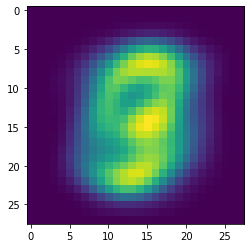

In [70]:
plt.imshow(d_i[0].reshape(28,28))

모델의 문제 : layer 얕음.. -> 더 깊게 할 것

깊게 할 수록 성능이 높아질 것임(비선형성 향상)

과적합 여부는 모름

### DEEP

In [61]:
(x_train, _),(x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000,28*28)
x_train = x_train/255
x_test = x_test.reshape(-1,28*28)
x_test = x_test/255

In [62]:
input_img = tf.keras.layers.Input((784,))
encoded = tf.keras.layers.Dense(256,activation='relu')(input_img)
encoded = tf.keras.layers.Dense(128,activation='relu')(encoded)
encoded = tf.keras.layers.Dense(64,activation='relu')(encoded)
encoded = tf.keras.layers.Dense(32,activation='relu')(encoded)

decoded = tf.keras.layers.Dense(64,activation='relu')(encoded)
decoded = tf.keras.layers.Dense(128,activation='relu')(decoded)
decoded = tf.keras.layers.Dense(256,activation='relu')(decoded)
decoded = tf.keras.layers.Dense(784,activation='sigmoid')(decoded)

autoencoder = autoencoder = tf.keras.models.Model(input_img, decoded)

In [63]:
autoencoder.compile(loss = 'binary_crossentropy',optimizer='adam')
autoencoder.fit(x_train, x_train, epochs=100,batch_size=256)

Epoch 1/100
235/235 [==============================] - 2s 8ms/step - loss: 0.2397
Epoch 2/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1493
Epoch 3/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1314
Epoch 4/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1214
Epoch 5/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1154
Epoch 6/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1110
Epoch 7/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1073
Epoch 8/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1046
Epoch 9/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1022
Epoch 10/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1005
Epoch 11/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0988
Epoch 12/100
235/235 [==============================] - 2s 9ms/step - loss: 0.0975
Epoch 13/100


235/235 [==============================] - 2s 8ms/step - loss: 0.0806
Epoch 100/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0805


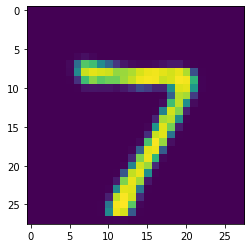

In [64]:
x_ = autoencoder.predict(x_test)[0]
plt.imshow(x_.reshape(28,28))

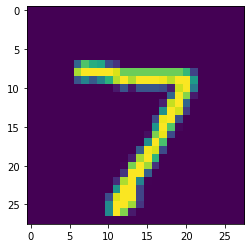

In [66]:
plt.imshow(x_test[0].reshape(28,28))

## Deep Convolutional Autoencoder

In [94]:
(x_train, _),(x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1,28,28,1)
x_train = x_train/255
x_test = x_test.reshape(-1,28,28,1)
x_test = x_test/255

In [96]:
input_img = tf.keras.layers.Input((28,28,1,))
x = tf.keras.layers.Conv2D(16,(3,3),activation='relu',padding='same')(input_img)
x = tf.keras.layers.MaxPool2D((2,2))(x)
x = tf.keras.layers.Conv2D(8,(3,3),activation='relu',padding='same')(x)
x = tf.keras.layers.MaxPool2D((2,2))(x)
x = tf.keras.layers.Conv2D(8,(3,3),activation='relu',padding='same')(x)
encoded = tf.keras.layers.MaxPool2D((2,2),padding='same')(x)

In [71]:
# 크기 복원? -> upsampling

b = np.arange(24).reshape(1,2,3,4)
a = tf.keras.layers.UpSampling2D((1,2))

In [72]:
a(b)

<tf.Tensor: shape=(1, 2, 6, 4), dtype=int32, numpy=
array([[[[ 0,  1,  2,  3],
         [ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [12, 13, 14, 15],
         [16, 17, 18, 19],
         [16, 17, 18, 19],
         [20, 21, 22, 23],
         [20, 21, 22, 23]]]])>

In [97]:
# UPsampling을 통해 원래 모양으로
# 마지막 부분은 똑같이 나와야 하므로 1로

x = tf.keras.layers.Conv2D(8,(3,3),activation='relu',padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2,2))(x)
x = tf.keras.layers.Conv2D(8,(3,3),activation='relu',padding='same')(x)
x = tf.keras.layers.UpSampling2D((2,2))(x)
x = tf.keras.layers.Conv2D(16,(3,3),activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2,2))(x)
decoded = tf.keras.layers.Conv2D(1,(3,3),activation='sigmoid',padding='same')(x)

In [98]:
autoencoder = autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(loss = 'binary_crossentropy',optimizer='adam')

In [99]:
autoencoder.summary()

Model: "functional_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 4, 4, 8)         

In [100]:
autoencoder.fit(x_train, x_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1483
Epoch 2/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.1127
Epoch 3/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.1063
Epoch 4/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.1026
Epoch 5/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.1003
Epoch 6/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0986
Epoch 7/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0972
Epoch 8/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0961 0s - 
Epoch 9/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0952
Epoch 10/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0945


In [102]:
autoencoder.fit(x_train, x_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0938
Epoch 2/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0933
Epoch 3/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0928
Epoch 4/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0924
Epoch 5/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0920
Epoch 6/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0917
Epoch 7/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0914
Epoch 8/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0911
Epoch 9/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0909
Epoch 10/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0906


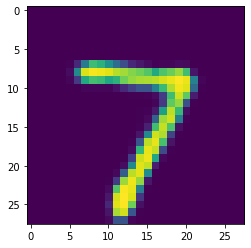

In [101]:
x_ = autoencoder.predict(x_test)[0]
plt.imshow(x_.reshape(28,28))

- 딥페이크 등에도 자주 쓰임
    - 대체하고 싶은 부분과 실제 이미지 컨볼루션
    
- denosing
    - noise넣고 학습하면 랜덤한 패턴때문에 고유특성이 아니라 생각하여 제거